Calculating characteristics...
[[-1.          0.        ]
 [-1.          0.00454545]
 [-1.          0.00909091]
 ...
 [ 1.          0.44090909]
 [ 1.          0.44545455]
 [ 1.          0.45      ]]


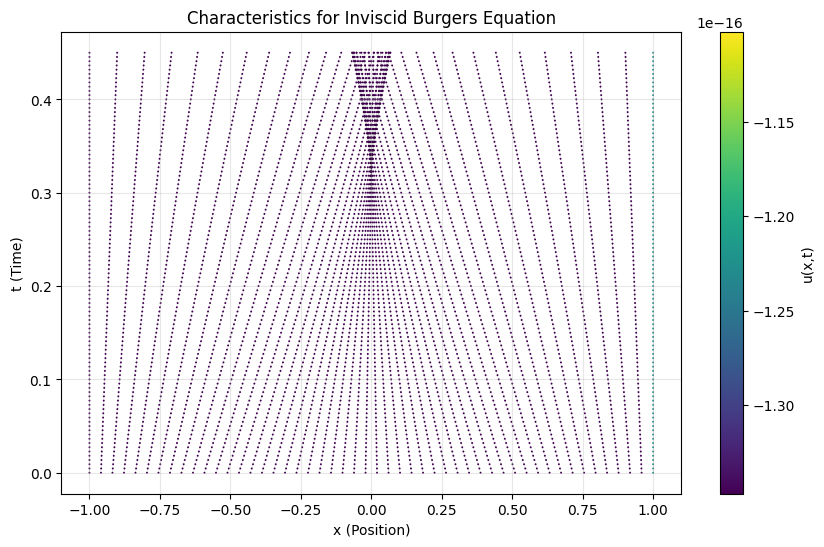

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

class CharacteristicSolver:
    def __init__(self, a_func, b_func, c_func):      
        self.a = a_func
        self.b = b_func
        self.c = c_func

    def _system_ode(self, s, state):
        """
        מגדיר את מערכת המד"ר עבור המשתנה הפרמטרי s.
        state = [t, x, u]
        """
        t, x, u = state
        
        # dt/ds = b
        # dx/ds = a
        # du/ds = c
        dt_ds = self.b(x, t, u)
        dx_ds = self.a(x, t, u)
        du_ds = self.c(x, t, u)
        
        return [dt_ds, dx_ds, du_ds]

    def solve(self, x0_array, u0_func, t_max=1.0, num_steps=100):
        """
        מחשב את הקווים האופייניים עבור סט של נקודות התחלה.
        
        Parameters:
        -----------
        x0_array : מערך של נקודות התחלה על ציר ה-x
        u0_func : פונקציית תנאי ההתחלה u(x, t=0)
        t_max : הזמן המקסימלי לסימולציה
        """
        results = []
        
        for x0 in x0_array:
            # 1. תנאי התחלה לכל קו אופייני (בזמן s=0)
            # אנחנו מתחילים ב-t=0, במיקום x0, עם ערך u0
            initial_state = [0.0, x0, u0_func(x0)]
            
            # 2. פתרון המד"ר לאורך הקו
            # אנו רצים עד s_max משוער (לרוב s זהה ל-t אם b=1)
            sol = solve_ivp(
                self._system_ode, 
                [0, t_max], 
                initial_state, 
                t_eval=np.linspace(0, t_max, num_steps),
                method='RK45' # Runge-Kutta מסדר גבוה
            )
            
            # sol.y מכיל [t, x, u] לכל צעד
            results.append({
                't': sol.y[0],
                'x': sol.y[1],
                'u': sol.y[2],
                'x0': x0
            })
            
        return results

    def plot_characteristics(self, results, title="Characteristic Curves"):
        """מצייר את הקווים במישור x-t עם צבע המייצג את ערך u"""
        plt.figure(figsize=(10, 6))
        
        for res in results:
            # ה-x וה-t הם המסלול, הצבע הוא הערך של u
            plt.scatter(res['x'], res['t'], c=res['u'], cmap='viridis', s=2, edgecolor='none')
            # אופציונלי: לצייר קו דק מחבר
            plt.plot(res['x'], res['t'], 'k-', alpha=0.1, linewidth=0.5)

        plt.colorbar(label='u(x,t)')
        plt.xlabel('x (Position)')
        plt.ylabel('t (Time)')
        plt.title(title)
        plt.grid(True, alpha=0.3)
        plt.show()


def run_burgers_example():
    # ut+uux = 0
    # ----------
    def a(x, t, u): return u  
    def b(x, t, u): return 1.0 
    def c(x, t, u): return 0.0  
    # ut+2ux = -u
    #def a(x, t, u): return 2.0
    #def b(x, t, u): return 1.0
    #def c(x, t, u): return -u
    def u_init(x): return -np.sin(np.pi * x)
    solver = CharacteristicSolver(a, b, c)   
    x0_points = np.linspace(-1, 1, 50)
    print("Calculating characteristics...")
    curves = solver.solve(x0_points, u_init, t_max=0.45)
    k=0
    for curve in curves:
        if k==0:
            a = np.hstack([curve['x'].reshape(-1, 1), curve['t'].reshape(-1, 1)])
            k=1
        else:
            a = np.concatenate((a, np.hstack([curve['x'].reshape(-1, 1), curve['t'].reshape(-1, 1)])))
    print (a)
    np.savetxt('X_pde_Charecataristics.csv', a, delimiter=',')
    #np.savetxt('t_pde_points.csv', sol.t, delimiter=',')

    solver.plot_characteristics(curves, title="Characteristics for Inviscid Burgers Equation")

if __name__ == "__main__":
    run_burgers_example()
    
    
    
    
    
    
    
    
    
    
